<a href="https://colab.research.google.com/github/matyi101/codes/blob/main/Sales_Data_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install numpy scipy patsy pandas
!pip3 install statsmodels

  Using cached https://files.pythonhosted.org/packages/da/69/8eef30a6237c54f3c0b524140e2975f4b1eea3489b45eb3339574fc8acee/statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl


# Sales Data Forecasting Using Seasonal ARIMA Model

Using ARIMA model, you can forecast a time series using the series past values. In this post, we build an optimal ARIMA model from scratch and extend it to Seasonal ARIMA (SARIMA) and SARIMAX models. You will also see how to build autoarima models in python

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

# plt.style.use('fivethirtyeight')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(14,7)})
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [7]:
url = 'https://raw.githubusercontent.com/matyi101/dataset/main/retail_sales.csv'
df = pd.read_csv(url)
df.set_index('date', inplace=True )


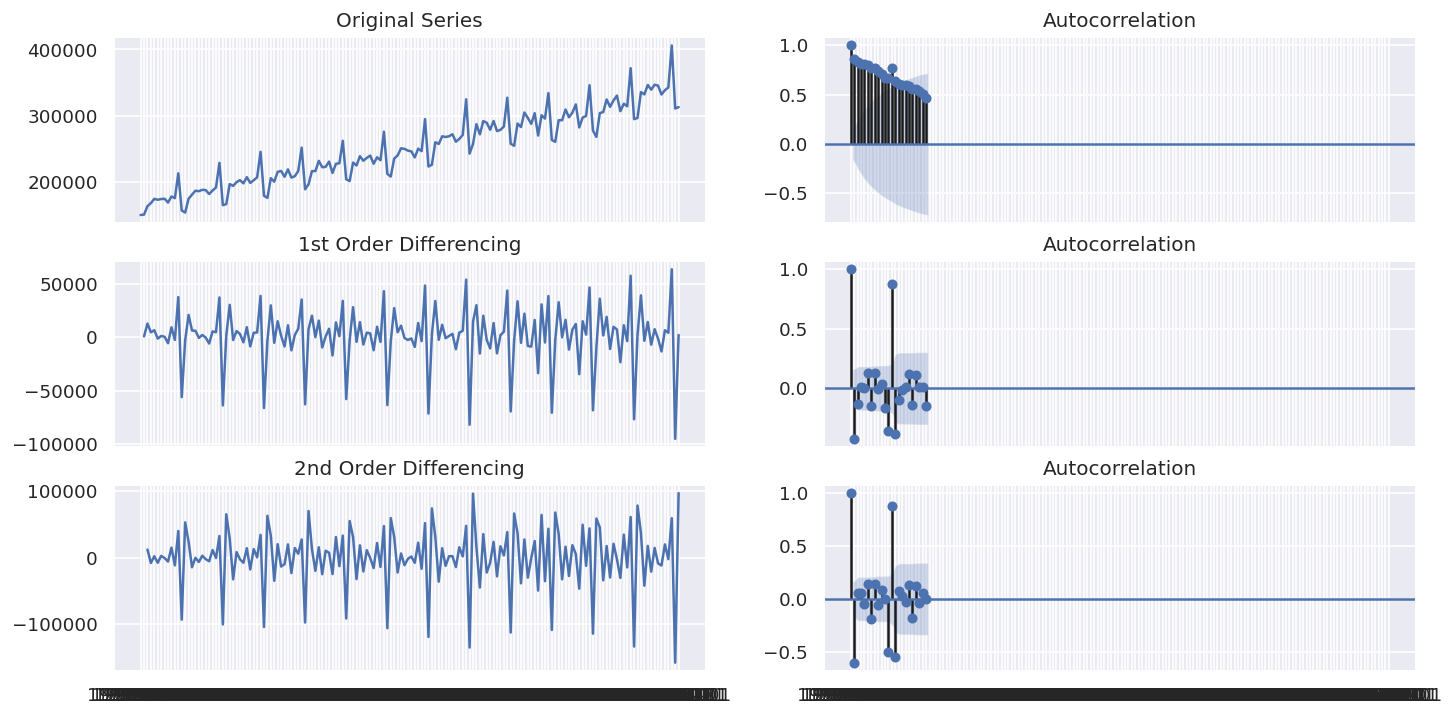

In [8]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [10]:
!pip install pmdarima

from pmdarima import arima

y = df.value

## Adf Test
arima.ndiffs(y, test='adf')  # 2

# KPSS test
arima.ndiffs(y, test='kpss')  # 0

# PP test:
arima.ndiffs(y, test='pp')  # 2

0

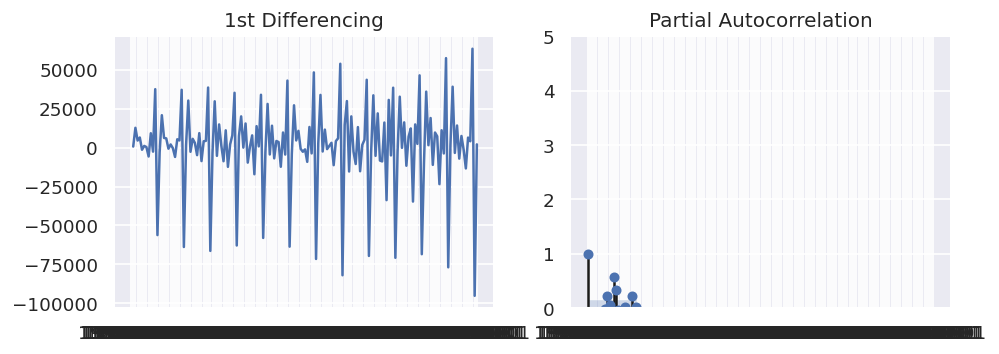

In [11]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [15]:
from statsmodels.tsa.arima_model import ARIMA


# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  157
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1768.354
Method:                       css-mle   S.D. of innovations          18555.808
Date:                Fri, 28 May 2021   AIC                           3546.707
Time:                        01:15:39   BIC                           3561.989
Sample:                    02-01-1992   HQIC                          3552.914
                         - 02-01-2005                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1122.0086     33.396     33.597      0.000    1056.554    1187.463
ar.L1.D.value    -0.6793      0.192     -3.536      0.000      -1.056      -0.303
ma.L1.D.value    -0.2666      0.172     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


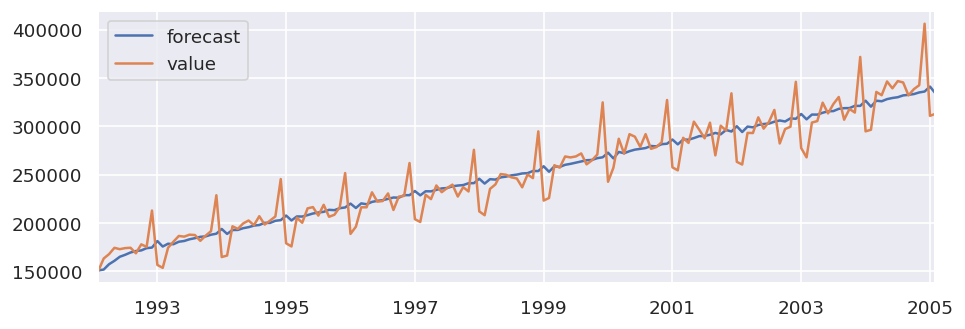

In [16]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()